<a href="https://colab.research.google.com/github/ToluGb/19-electric-power/blob/ToluGb-data-preprocessing/Electric_Power_Data_Vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # for numerical computation
import pandas as pd # for data analysis and manipulation

In [2]:
from google.colab import drive # for reading files from the directory
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/content/drive/My Drive/foo.txt'

Hello Google Drive!

In [4]:
# We read the file into a pandas DataFrame and view the dataset
df = pd.read_csv('/content/drive/My Drive/household_power_consumption.txt', delimiter=';', na_values=['nan','?'], dtype={'Global_active_power':np.float64,
                'Global_reactive_power':np.float64, 'Voltage':np.float64 ,'Global_intensity':np.float64,
                'Sub_metering_1':np.float64, 'Sub_metering_2':np.float64,'Sub_metering_3': np.float64})


In [5]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
df["Date"] = pd.to_datetime(df["Date"]) #convert Date to datetime
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


**Data Preprocessing**

In [7]:
# To check the number of rows and columns (shape) of the dataset in the DataFrame
df.shape

(2075259, 9)

In [8]:
# To get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 142.5+ MB


In [9]:
# To check for missing values
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [12]:
# We use Backfill to replace the missing data in the dataset
for NaN in range(0,9):        
        df.iloc[:,NaN] = df.iloc[:,NaN].fillna(df.iloc[:,NaN].bfill())

In [13]:
# We verify again to ensure there are no more missing data
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [14]:
df.describe() 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.094391e+00,1.239705e-01,2.408240e+02,4.638736e+00,1.107975e+00,1.290500e+00,6.468201e+00
std,1.054990e+00,1.126516e-01,3.251230e+00,4.434058e+00,6.115943e+00,5.787128e+00,8.455677e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.389600e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.200000e-01,1.000000e-01,2.410100e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.536000e+00,1.960000e-01,2.429000e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [15]:
# Average power consumption daily for the span of four years
df_avg = df.groupby(['Date']).mean()

Text(0.5, 1.0, 'Sub_metering_3')

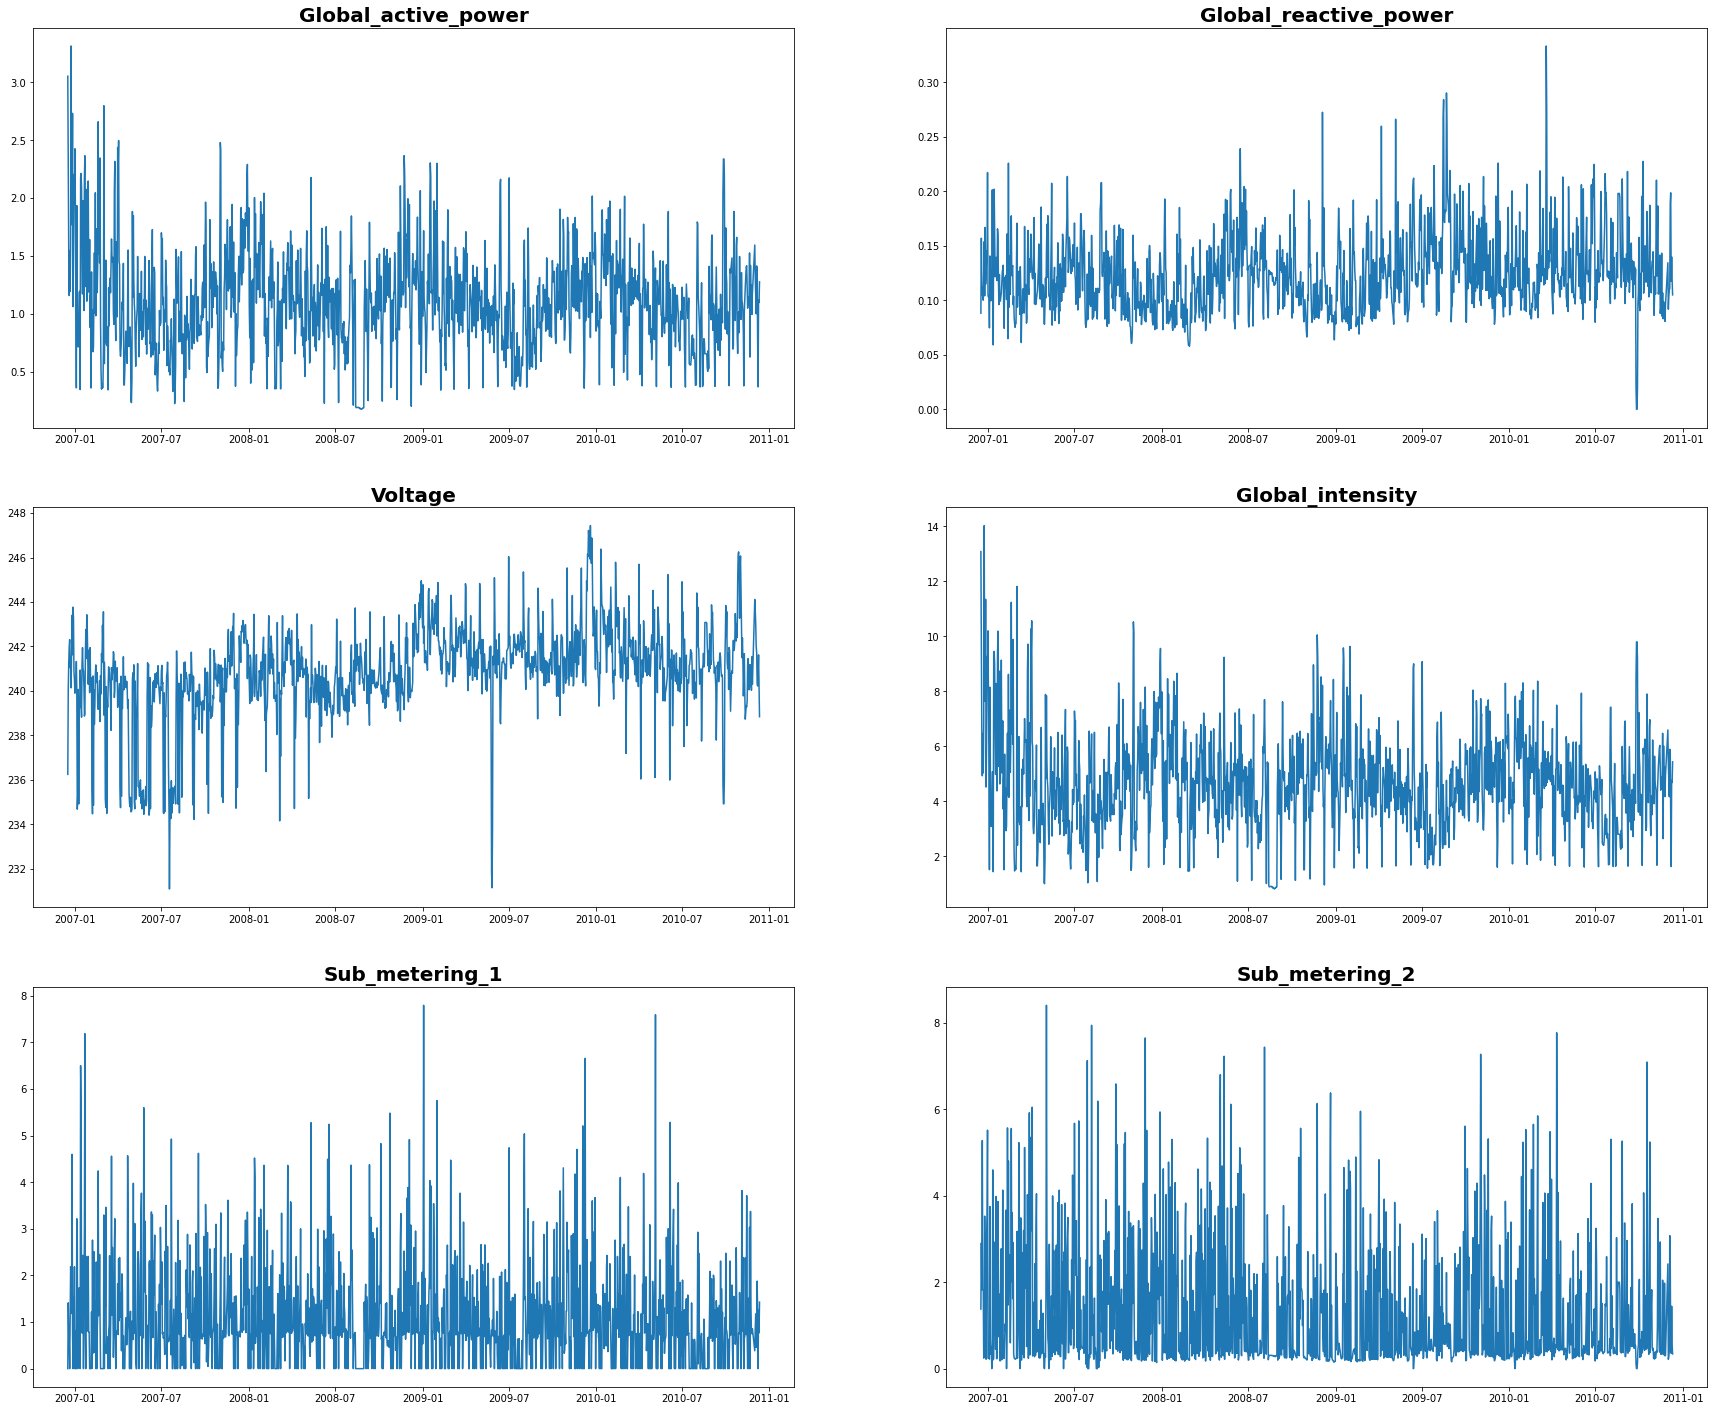

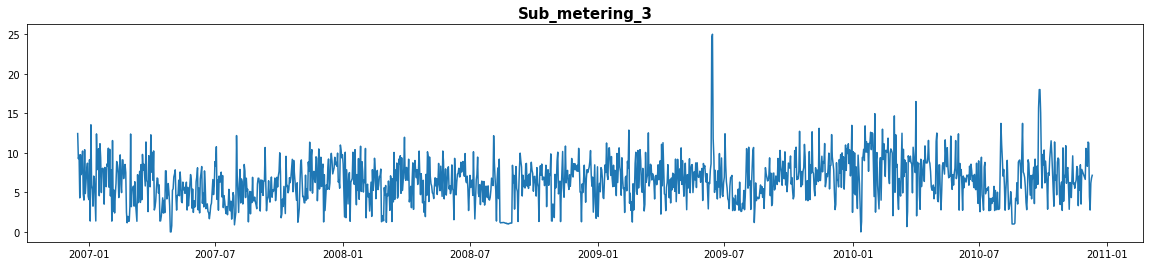

In [16]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, figsize = (30, 25))
columns = df_avg.columns
axs[0, 0].plot(df_avg[columns[0]])
axs[0, 0].set_title(columns[0], fontweight = 'bold', size = 20)

axs[0, 1].plot(df_avg[columns[1]])
axs[0, 1].set_title(columns[1], fontweight = 'bold', size = 20)

axs[1, 0].plot(df_avg[columns[2]])
axs[1, 0].set_title(columns[2], fontweight = 'bold', size = 20)

axs[1, 1].plot(df_avg[columns[3]])
axs[1, 1].set_title(columns[3], fontweight = 'bold', size = 20)

axs[2, 0].plot(df_avg[columns[4]])
axs[2, 0].set_title(columns[4], fontweight = 'bold', size = 20)

axs[2, 1].plot(df_avg[columns[5]])
axs[2, 1].set_title(columns[5], fontweight = 'bold', size = 20)

fig, axs = plt.subplots( figsize = (20, 4))
axs.plot(df_avg[columns[6]])
axs.set_title(columns[6], fontweight = 'bold', size = 15)

In [17]:
# Average power consumption monthly
df_avg_mth = df.groupby(df['Date'].dt.strftime('%B')).mean()
reorderlist = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December' ]
df_avg_mth = df_avg_mth.reindex(reorderlist)

Text(0.5, 1.0, 'Sub_metering_3')

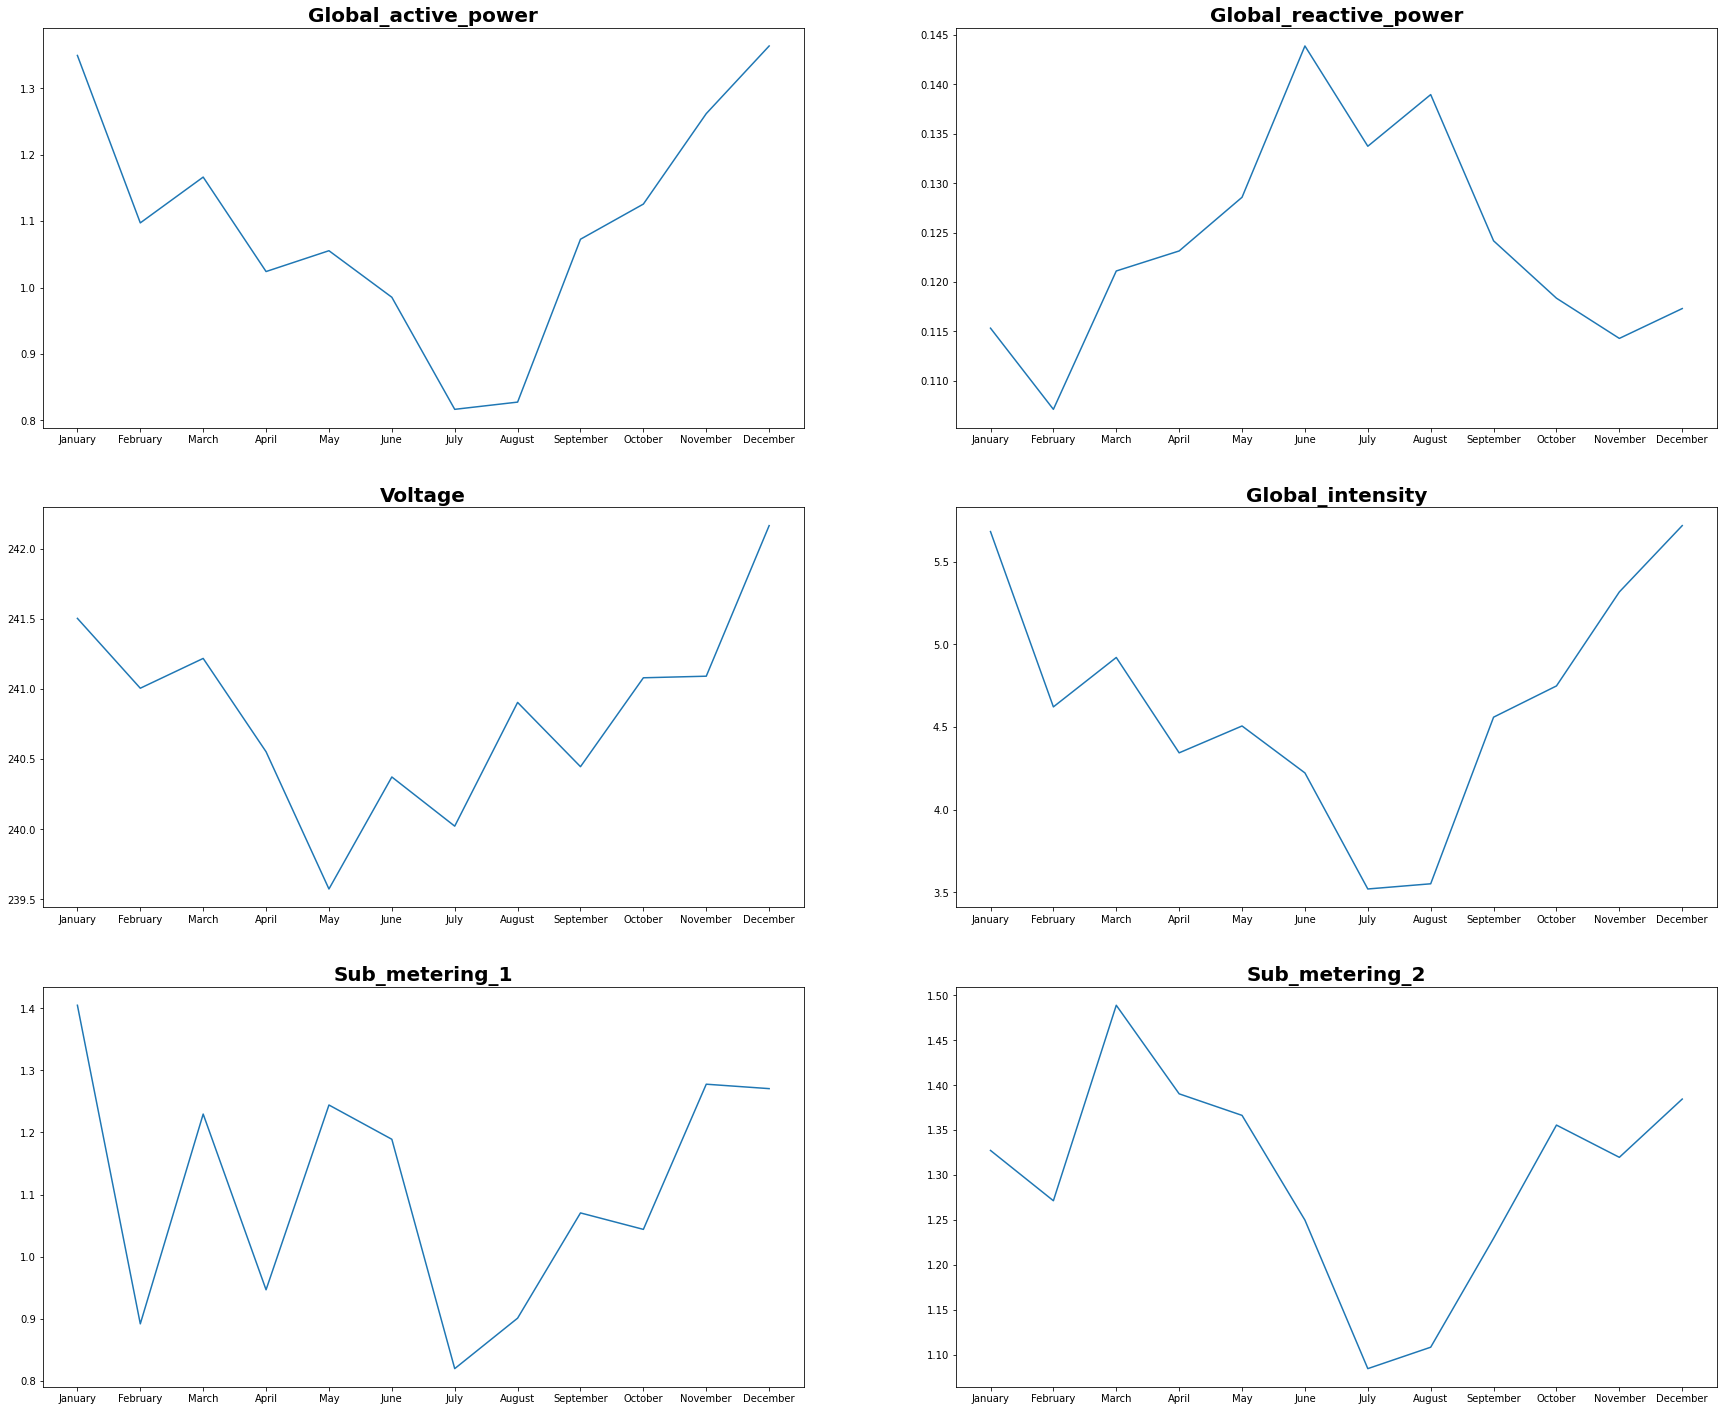

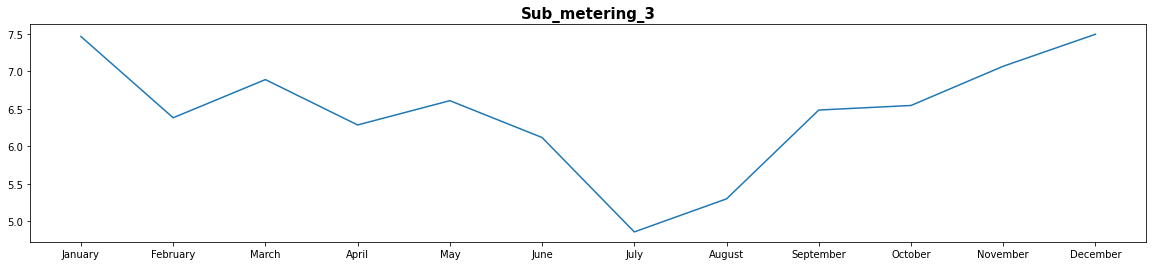

In [28]:
fig, axs = plt.subplots(3, 2, figsize = (30, 25))
columns = df_avg_mth.columns

axs[0, 0].plot(df_avg_mth[columns[0]])
axs[0, 0].set_title(columns[0], fontweight = 'bold', size = 20)

axs[0, 1].plot(df_avg_mth[columns[1]])
axs[0, 1].set_title(columns[1], fontweight = 'bold', size = 20)

axs[1, 0].plot(df_avg_mth[columns[2]])
axs[1, 0].set_title(columns[2], fontweight = 'bold', size = 20)

axs[1, 1].plot(df_avg_mth[columns[3]])
axs[1, 1].set_title(columns[3], fontweight = 'bold', size = 20)

axs[2, 0].plot(df_avg_mth[columns[4]])
axs[2, 0].set_title(columns[4], fontweight = 'bold', size = 20)

axs[2, 1].plot(df_avg_mth[columns[5]])
axs[2, 1].set_title(columns[5], fontweight = 'bold', size = 20)

fig, axs = plt.subplots( figsize = (20, 4))
axs.plot(df_avg_mth[columns[6]])
axs.set_title(columns[6], fontweight = 'bold', size = 15)